# Projeto Ações e Email automático

Passo a passo do problema
- Buscar as informações da ação automaticamente
- Criar as análises solicitadas
    - Cotação Máx.
    - Cotação Mín.
    - Valor médio
- Enviar um email automaticamente para o gestor

#### Buscar dados da ação

Bibliotecas: `yfinance e matplotlib` 

In [1]:
import pyautogui
import yfinance
import pyperclip
import webbrowser
import time

In [4]:
ticker = input("Digite o código da ação desejada: ")
dt_inicial = input("Digite a data inicial (aaaa-mm-dd): ")
dt_final = input("Digite a data final (aaaa-mm-dd): ")
dados = yfinance.Ticker(ticker)
tabela=dados.history(start=dt_inicial, end=dt_final)
tabela

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-02 00:00:00-03:00,109734.0,109734.0,105981.0,106376.0,8130500,0.0,0.0
2023-01-03 00:00:00-03:00,106377.0,106684.0,103852.0,104166.0,14466700,0.0,0.0
2023-01-04 00:00:00-03:00,104167.0,105627.0,103915.0,105334.0,14451200,0.0,0.0
2023-01-05 00:00:00-03:00,105336.0,107743.0,105333.0,107518.0,15512000,0.0,0.0
2023-01-06 00:00:00-03:00,107642.0,109433.0,107642.0,108836.0,12626600,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00-03:00,130826.0,132277.0,130822.0,132182.0,8681000,0.0,0.0
2023-12-22 00:00:00-03:00,132553.0,133035.0,132094.0,132753.0,8231100,0.0,0.0
2023-12-26 00:00:00-03:00,132753.0,133645.0,132753.0,133533.0,0,0.0,0.0


#### Apenas a coluna de saída e gerar um gráfico

<Axes: xlabel='Date'>

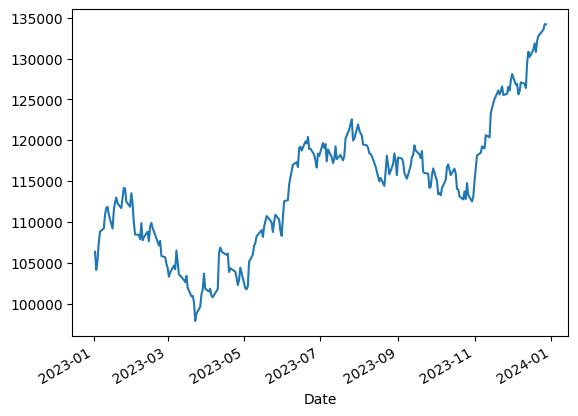

In [8]:
fechamento = tabela.Close
fechamento
fechamento.plot()

#### Criar as análises solicitadas

- Cotação Máx
- Cotação Mín
- Valor Médio

In [9]:
maxima = round(fechamento.max(), 2)
minima = round(fechamento.min(), 2)
valor_medio = round(fechamento.mean(), 2)

print(maxima)
print(minima)
print(valor_medio)

134194.0
97926.0
114194.02


#### Enviar o e-mail automaticamente

- abrir o navegador e ir para o gmail
- clicar no botão Escrever
- Digitar o e-mail do destinatário e teclar TAB
- Digitar o assunto e teclar TAB
- Digitar mensagem
- Clicar no botão enviar

#### Bibliotecas

In [22]:
import pyautogui
import pyperclip
import webbrowser
import time

destinatario = "costasantos.gilmar@gmail.com"
assunto = "Análises do Projeto 2020"

mensagem = f"""
Prezado Gestor,

Seguem as análises solicitadas da ação {ticker}:

Cotação Máxima: R${maxima}
Cotação Mínima: R${minima}
Valor Médio: R${valor_medio}

Qualquer dúvida estou a disposição!

Att.
Gilmar Santos
"""

# abrir o navegador e ir para o gmail
webbrowser.open('www.gmail.com')
time.sleep(5)

# configurando uma pausa de 3 segs
pyautogui.PAUSE = 3

# clicar no botão escrever
pyautogui.click(x=57, y=181)

time.sleep(2)

# digitar o email do destinatário e teclar TAB
pyperclip.copy(destinatario)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# digitar o assunto do email
pyperclip.copy(assunto)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# digitar a mensagem
pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")

# clicar no botão enviar
pyautogui.click(x=983, y=859)

In [19]:
time.sleep(5)
pyautogui.position()

Point(x=983, y=859)